In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style="whitegrid")

df = pd.read_csv('trajectories_distances.csv')
df.head()

,SSPD Euclidean,SSPD Spherical,DTW Euclidean,DTW Spherical,Hausdorff Euclidean,Hausdorff Spherical,LCSS Euclidean,LCSS Spherical,ERP Euclidean,ERP Spherical,EDR Euclidean,EDR Spherical,Discrete Frechet,Frechet
0,0.000698,145.874010,62.121046,6.865585e+06,0.005651,622.278595,0.178571,0.0,2015.065552,2.234154e+08,0.059603,0.061810,0.661178,0.007786
1,0.000817,169.968520,90.726438,1.001925e+07,0.014788,1645.566211,0.107143,0.0,2806.615763,3.110920e+08,0.046552,0.048276,0.561613,0.014788
2,0.000859,180.731980,74.653536,8.241267e+06,0.015111,1681.579276,0.181818,0.0,2505.002272,2.776930e+08,0.062030,0.062030,0.552230,0.015111
3,0.000761,164.096839,68.640327,7.583846e+06,0.004570,502.705987,0.115385,0.0,1988.109944,2.204401e+08,0.054945,0.057143,0.598904,0.011263
4,0.001443,314.842944,54.727869,6.050311e+06,0.014961,1663.779673,0.166667,0.0,2264.175164,2.510021e+08,0.072581,0.072581,0.601229,0.028049


In [2]:

df_euclidean = df.filter(like="Euclidean").copy()  # Filter columns with Euclidean metrics and create a copy
df_spherical = df.filter(like="Spherical")  # Filter columns with Spherical metrics

# Add Frechet distance to Euclidean metrics using .loc to avoid SettingWithCopyWarning
df_euclidean.loc[:, 'Frechet'] = df['Frechet']
df_euclidean.loc[:, 'Discrete Frechet'] = df['Discrete Frechet']

df_euclidean.columns = df_euclidean.columns.str.replace('Euclidean', '').str.strip()
df_euclidean.columns = df_euclidean.columns.str.replace('Discrete', 'Dis.').str.strip()

df_spherical.columns = df_spherical.columns.str.replace('Spherical', '').str.strip()


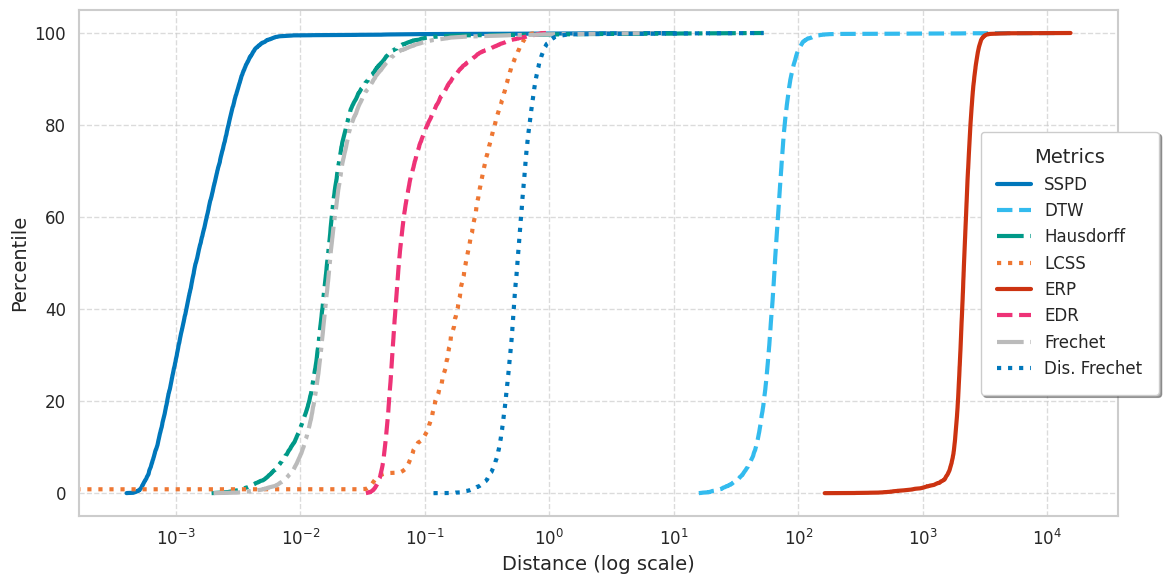

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib.lines import Line2D
from cycler import cycler

sns.set(style="whitegrid")
# Set the style for a clean, professional look
# plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid", {'axes.grid': True, 'grid.color': '.8', 'grid.linestyle': ':'})
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Arial']

# Define a custom color palette (colorblind-friendly)
custom_colors = [
    "#0077BB",  # Blue
    "#33BBEE",  # Cyan
    "#009988",  # Teal
    "#EE7733",  # Orange
    "#CC3311",  # Red
    "#EE3377",  # Magenta
    "#BBBBBB",  # Grey
]

# Define line styles
line_styles = ['-', '--', '-.', ':']

def plot_data(ax, data):
    num_columns = len(data.columns)
    colors = custom_colors * (num_columns // len(custom_colors) + 1)
    styles = line_styles * (num_columns // len(line_styles) + 1)

    for idx, column in enumerate(data.columns):
        column_data = data[column]
        percentiles = [stats.percentileofscore(column_data, value) for value in column_data]
        ax.plot(sorted(column_data), sorted(percentiles),
                label=column,
                color=colors[idx],
                linestyle=styles[idx],
                linewidth=3)

    # Customize the plot
    ax.set_xlabel('Distance (log scale)', fontsize=14)
    ax.set_ylabel('Percentile', fontsize=14)
    # ax.set_title('Percentile Plot of Distances', fontsize=16, fontweight='bold')
    ax.set_xscale('log')
    ax.grid(True, linestyle='--', alpha=0.7, color='#CCCCCC')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)

    # Add a box around the plot
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.5)

    # Customize legend
    legend = ax.legend(fontsize=12,
                       loc='center left',
                       bbox_to_anchor=(0.86, 0.5),
                       frameon=True,
                       fancybox=True,
                       shadow=True,
                       borderpad=1)
    legend.set_title("Metrics", prop={'size': 14})


# Set up the figure size and subplot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
plot_data(ax, df_euclidean)



# Adjust the layout and save
plt.tight_layout()
plt.savefig('../.figures/percentile_plots_euclidean.png', bbox_inches='tight')
plt.show()

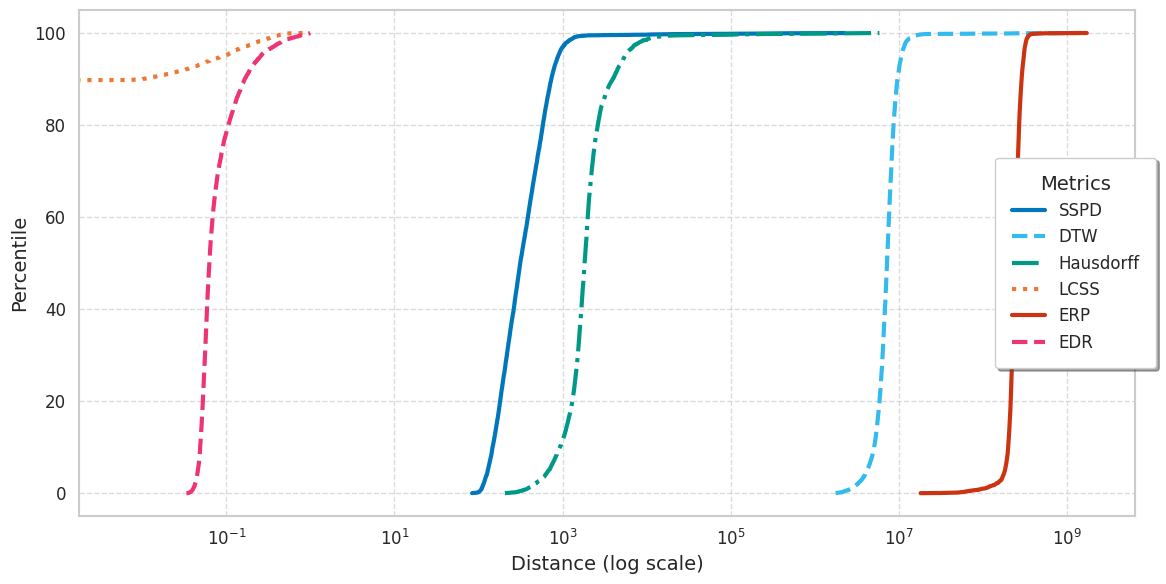

In [4]:
# plot spherical
fig, ax = plt.subplots(figsize=(12, 6))
plot_data(ax, df_spherical)
plt.tight_layout()
plt.savefig('../.figures/percentile_plots_spherical.png', bbox_inches='tight')
plt.show()

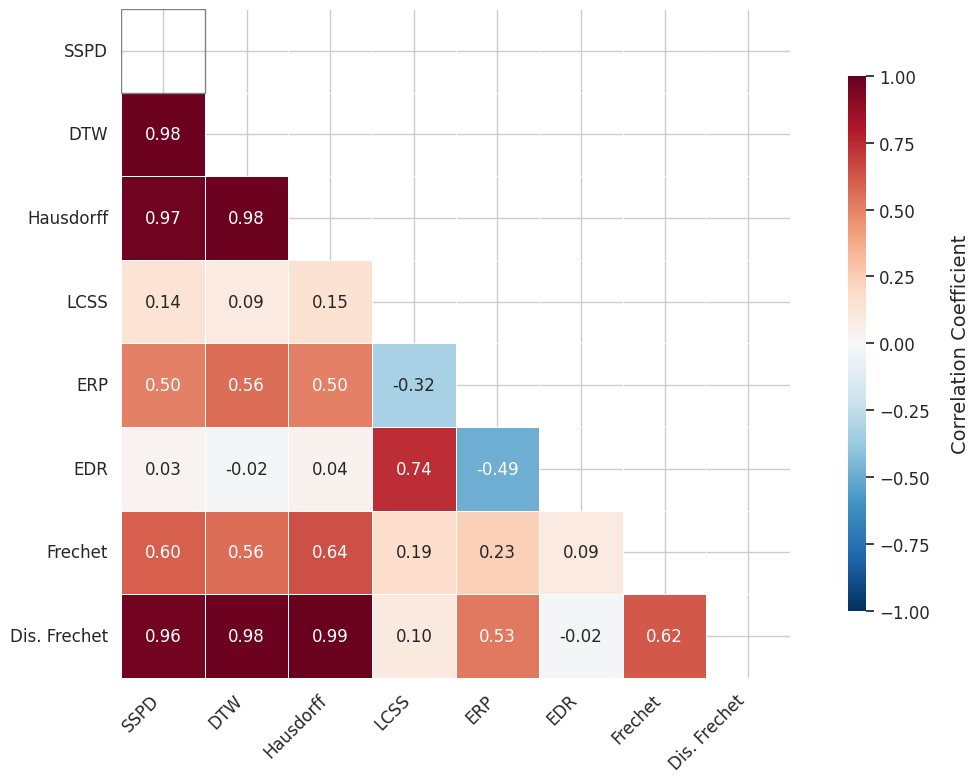

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
# Set up a larger figure
plt.figure(figsize=(12, 8))


# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(df_euclidean.corr(), dtype=bool))

# Create the heatmap with additional styling
heatmap = sns.heatmap(df_euclidean.corr(),
                      annot=True,
                      fmt='.2f',
                      cmap='RdBu_r',  # A more color-blind friendly palette
                      vmin=-1, vmax=1,
                      center=0,
                      linewidths=0.5,
                      linecolor='white',
                      cbar_kws={'shrink': 0.8, 'aspect': 30, 'label': 'Correlation Coefficient'},
                      square=True,
                      mask=mask)  # Apply the mask to hide upper triangle

# Customize the plot
# plt.title('Correlation Heatmap of Euclidean Distance Metrics', fontsize=20, weight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)

# Adjust colorbar label
cbar = heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Correlation Coefficient', fontsize=14,  labelpad=15)
cbar.ax.tick_params(labelsize=12)

# Add a subtle border around the heatmap
heatmap.figure.axes[0].add_artist(plt.Rectangle((0, 0), 1, 1, fill=False, edgecolor='gray', lw=1))

# Adjust layout and save
plt.tight_layout()
plt.savefig('../.figures/correlation_heatmap_euclidean.png', bbox_inches='tight')
plt.show()

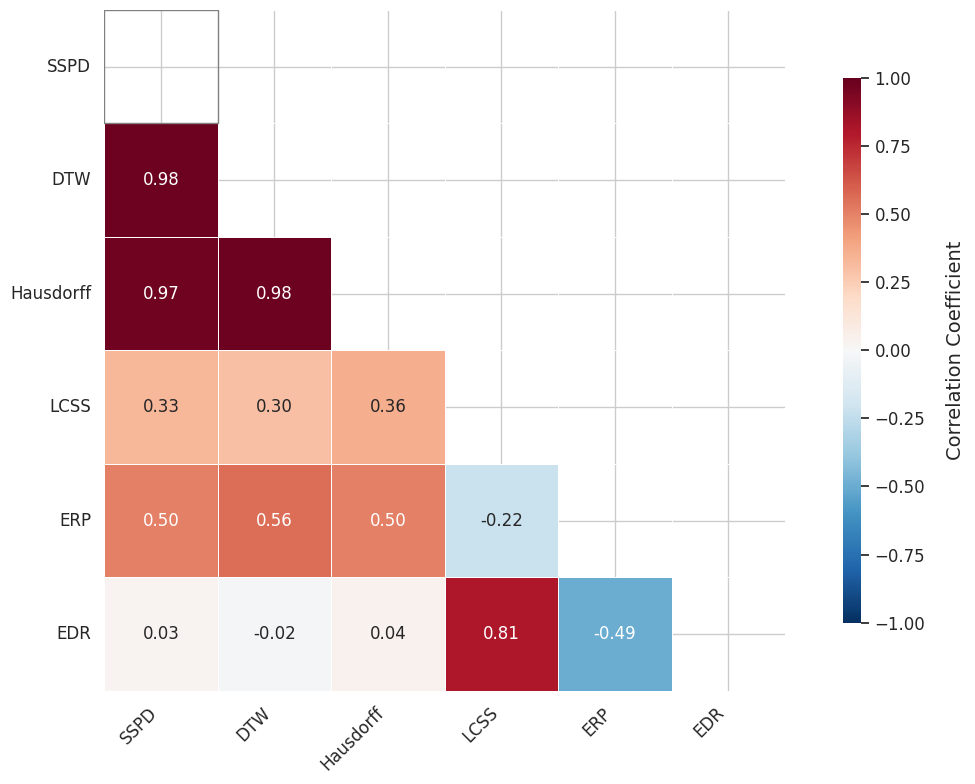

In [6]:
# correlation heatmap spherical

plt.figure(figsize=(12, 8))

mask = np.triu(np.ones_like(df_spherical.corr(), dtype=bool))

heatmap = sns.heatmap(df_spherical.corr(),
                        annot=True,
                        fmt='.2f',
                        cmap='RdBu_r',
                        vmin=-1, vmax=1,
                        center=0,
                        linewidths=0.5,
                        linecolor='white',
                        cbar_kws={'shrink': 0.8, 'aspect': 30, 'label': 'Correlation Coefficient'},
                        square=True,
                        mask=mask)

plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)

cbar = heatmap.collections[0].colorbar
cbar.ax.set_ylabel('Correlation Coefficient', fontsize=14, labelpad=15)
cbar.ax.tick_params(labelsize=12)

heatmap.figure.axes[0].add_artist(plt.Rectangle((0, 0), 1, 1, fill=False, edgecolor='gray', lw=1))

plt.tight_layout()
plt.savefig('../.figures/correlation_heatmap_spherical.png', bbox_inches='tight')
plt.show()